In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
A = np.array([1,2,3,4,5,6]) 
B = np.array([13, 21, 34])

In [19]:
#A.extend(B)

In [20]:
##Code to Create in a Sigle Dimesion Would Be
np.concatenate((A, B))

array([ 1,  2,  3,  4,  5,  6, 13, 21, 34])

In [21]:
#Ways to Create an Identity Matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
fuel = pd.read_csv('fuel_data.csv')
fuel.head() 

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [29]:
plt.figure(figsize=(20,6))
fuel.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

<Figure size 1440x432 with 0 Axes>

In [31]:
fuel['fuel_mmbtu_per_unit'].std()

10.600220307806886

In [32]:
fuel['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [34]:
fuel['fuel_qty_burned'].skew()

15.851495469109503

In [35]:
fuel['fuel_qty_burned'].kurtosis()

651.3694501337732

In [37]:
#check for missing values in each column
fuel.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [39]:
fuel.isnull().sum()/len(fuel)*100

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [43]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [45]:
fuel['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [46]:
fuel.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


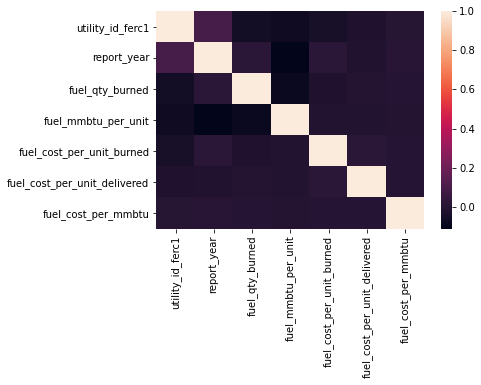

In [48]:
import seaborn as sns
sns.heatmap(fuel.corr())

In [51]:
coal = fuel[fuel['fuel_type_code_pudl']=='coal']

In [59]:
coal = coal.set_index('report_year')

In [64]:
ccoal_pct = coal.iloc[:1998]

In [65]:
ccoal_pct['fuel_cost_per_unit_burned'].pct_change()

report_year
1994         NaN
1994   -0.000538
1994    1.137783
1994    0.188570
1994   -0.062910
          ...   
1998   -0.035048
1998    0.049717
1998    0.022822
1998   -0.473608
1998   -0.025980
Name: fuel_cost_per_unit_burned, Length: 1998, dtype: float64

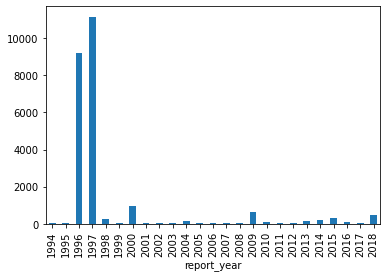

In [68]:
ax = fuel.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().plot.bar()